# Summary of Study ST002492

| META | INFO|
|--- | --- |
|Study ID	|ST002492
|Study Title	|Composition of raw plant-based food items
|Study Type	|Composition of food
|Study Summary	|The goal of this study was to use metabolomics as a platform to elucidate the chemical composition of plants in order to increase their resolution and in turn use the identified chemicals to reveal potential health impacts. 20 plant foods were studied: apple, banana, tomato, lettuce, strawberry, carrot, peach, onion, spinach, pepper, corn, garlic, basil, potato, soybean, black bean, olive, chickpea, sugarbeet, and pear.
| URL | https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Study&DataMode=ChromatographyData&StudyID=ST002492&StudyType=MS&ResultType=1#DataTabs|

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances as dist 

In [11]:
path = r'https://www.metabolomicsworkbench.org/data/showfile_t.php?RA=24.209.73.74&DF=MSdata_ST002492_2.txt'

raw_df = (pd.read_csv(path, sep = '\t', header = [1],
             index_col = [0],
        )
         ).iloc[:-2]
raw_df.tail()

,FB06135220,FB06135221,FB06135232,FB06135214,FB06135217,FB06135223,FB06135279,FB06135280,FB06135287,FB06135225,...,FB06135270,FB06135219,FB06135230,FB06135251,FB06135261,FB06135300,FB06135301,FB06135215,FB06135224,FB06135256
Samples,,,,,,,,,,,,,,,,,,,,,
X-23782,NaN,NaN,NaN,155296,120614,192670,5076881,4710444,4714601,217375,...,9790251,98096,NaN,NaN,NaN,NaN,NaN,3736646,3653615,4433766
X-24208,NaN,NaN,NaN,16756725,13785198,17693596,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-24210,NaN,NaN,NaN,NaN,NaN,NaN,80880632,71745984,90184432,NaN,...,106484432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139744,NaN
X-24234,100813,NaN,NaN,1589163,NaN,NaN,684477,586621,977819,188038,...,79413,NaN,146188,NaN,NaN,NaN,128325,NaN,129898,35056
X-24984,2200609,2059469,1857127,NaN,743758,NaN,575966784,489424480,565794240,NaN,...,513136416,35721960,30972232,38987836,597863,380461,384745,NaN,1940539,NaN


In [15]:
df = raw_df.drop(index = 'Factors').fillna(0)
df.head()

,FB06135220,FB06135221,FB06135232,FB06135214,FB06135217,FB06135223,FB06135279,FB06135280,FB06135287,FB06135225,...,FB06135270,FB06135219,FB06135230,FB06135251,FB06135261,FB06135300,FB06135301,FB06135215,FB06135224,FB06135256
Samples,,,,,,,,,,,,,,,,,,,,,
1_2-dilinolenoyl-digalactosylglycerol (18:3/18:3),5348578,5263336,4561471,891791,835554,1093824,184215520,156121904,183388000,7193105,...,155202992,9352812,12976294,12244281,1947382,2060552,2199971,14404655,18147512,19726986
1_2-dilinolenoyl-galactosylglycerol (18:3/18:3)*,8141854,8501999,6874993,2593460,2277542,2892528,495638144,467026912,573815744,4976941,...,516657280,21398818,23136536,23990656,4626075,4820050,4973986,39708856,44894328,51556616
1_2-dilinolenoyl-GPA (18:3/18:3)*,1042175,197096,0,292918,0,0,14261605,11594171,13900366,2170594,...,16705330,1267822,1315984,984947,784609,1740173,471105,2486697,2787416,2127147
1_2-dilinoleoyl-digalactosylglycerol (18:2/18:2)*,8840195,8110804,7667792,4403033,3578896,4652692,9474392,9073188,10582975,2573058,...,26207144,2658378,3093834,2993005,5526496,6760841,6002528,8106543,8152816,10485027
1_2-dilinoleoyl-galactosylglycerol (18:2/18:2)*,15075185,13653699,12575448,4887822,4180231,5644604,30009178,27030320,33054420,1676855,...,44426784,0,0,0,10765763,12973513,12056354,35565072,37683848,46316688


In [28]:
sample_info = (raw_df.loc['Factors']
 .str.replace("Species:", "")
 .str.split('|', expand = True)[0]
 .str.strip()
).to_frame('sample_id')

sample_info.head()

,sample_id
FB06135220,Apple
FB06135221,Apple
FB06135232,Apple
FB06135214,Banana
FB06135217,Banana


In [30]:
df.columns = df.columns.map(sample_info['sample_id'])
df.head()

,Apple,Apple,Apple,Banana,Banana,Banana,Basil,Basil,Basil,Black bean,...,Spinach,Strawberry,Strawberry,Strawberry,Sugarbeet,Sugarbeet,Sugarbeet,Tomato,Tomato,Tomato
Samples,,,,,,,,,,,,,,,,,,,,,
1_2-dilinolenoyl-digalactosylglycerol (18:3/18:3),5348578,5263336,4561471,891791,835554,1093824,184215520,156121904,183388000,7193105,...,155202992,9352812,12976294,12244281,1947382,2060552,2199971,14404655,18147512,19726986
1_2-dilinolenoyl-galactosylglycerol (18:3/18:3)*,8141854,8501999,6874993,2593460,2277542,2892528,495638144,467026912,573815744,4976941,...,516657280,21398818,23136536,23990656,4626075,4820050,4973986,39708856,44894328,51556616
1_2-dilinolenoyl-GPA (18:3/18:3)*,1042175,197096,0,292918,0,0,14261605,11594171,13900366,2170594,...,16705330,1267822,1315984,984947,784609,1740173,471105,2486697,2787416,2127147
1_2-dilinoleoyl-digalactosylglycerol (18:2/18:2)*,8840195,8110804,7667792,4403033,3578896,4652692,9474392,9073188,10582975,2573058,...,26207144,2658378,3093834,2993005,5526496,6760841,6002528,8106543,8152816,10485027
1_2-dilinoleoyl-galactosylglycerol (18:2/18:2)*,15075185,13653699,12575448,4887822,4180231,5644604,30009178,27030320,33054420,1676855,...,44426784,0,0,0,10765763,12973513,12056354,35565072,37683848,46316688


In [36]:
df = df.astype(int)

In [40]:
group_df = df.groupby(axis = 1, level = 0).median()
group_df.head()

,Apple,Banana,Basil,Black bean,Carrot,Chickpeas,Corn,Garlic,Lettuce,Olives,Onion,Peach,Pear,Pepper,Potato,Soybean,Spinach,Strawberry,Sugarbeet,Tomato
Samples,,,,,,,,,,,,,,,,,,,,
1_2-dilinolenoyl-digalactosylglycerol (18:3/18:3),5263336.0,891791.0,183388000.0,7193105.0,22163948.0,0.0,2444510.0,511261.0,65146900.0,2852797.0,238045.0,7168193.0,7125992.0,76568952.0,3015946.0,4501697.0,198221408.0,12244281.0,2060552.0,18147512.0
1_2-dilinolenoyl-galactosylglycerol (18:3/18:3)*,8141854.0,2593460.0,495638144.0,4976941.0,52224560.0,0.0,9039038.0,1953701.0,156385088.0,21340680.0,1275861.0,17218960.0,15482701.0,227157488.0,13675451.0,460826.0,626950208.0,23136536.0,4820050.0,44894328.0
1_2-dilinolenoyl-GPA (18:3/18:3)*,197096.0,0.0,13900366.0,2170594.0,1200527.0,0.0,240517.0,91753.0,7952291.0,350410.0,196711.0,405431.0,243408.0,1446369.0,1325515.0,510939.0,23283128.0,1267822.0,784609.0,2486697.0
1_2-dilinoleoyl-digalactosylglycerol (18:2/18:2)*,8110804.0,4403033.0,9474392.0,2811731.0,70322416.0,3724135.0,23627964.0,479600.0,35230956.0,1558639.0,3985232.0,5228412.0,9864191.0,9120267.0,27334218.0,2926928.0,32804504.0,2993005.0,6002528.0,8152816.0
1_2-dilinoleoyl-galactosylglycerol (18:2/18:2)*,13653699.0,4887822.0,30009178.0,1676855.0,118644712.0,1159458.0,23943196.0,1568151.0,18899256.0,0.0,4367361.0,17477216.0,16866676.0,41485960.0,37830196.0,705042.0,60101640.0,0.0,12056354.0,37683848.0


In [41]:
df.shape

(69, 60)

In [48]:
X = group_df.T
X.head()

ncomp = 4
pca_cols = [f'pc{val+1}' for val in range(ncomp)]
pca_pipe = make_pipeline(StandardScaler(),
                         PCA(ncomp).set_output(transform = 'pandas')
                        )
scores = pca_pipe.fit_transform(X)
scores.columns = pca_cols
scores.index = X.index
scores.head()


,pc1,pc2,pc3,pc4
Apple,-2.444035,-1.123780,0.668177,-2.030447
Banana,-2.894127,-0.839775,0.249356,-1.762664
Basil,12.031901,4.037054,8.321907,-2.607460
Black bean,-1.841918,2.108435,-0.711983,0.409886
Carrot,1.951073,-2.576480,2.024527,7.946037


In [51]:
sim_df = pd.DataFrame(dist(scores, metric = 'euclidean'),
             columns = scores.index,
             index = scores.index
            )

sim_df.head()

,Apple,Banana,Basil,Black bean,Carrot,Chickpeas,Corn,Garlic,Lettuce,Olives,Onion,Peach,Pear,Pepper,Potato,Soybean,Spinach,Strawberry,Sugarbeet,Tomato
Apple,0.000000,0.728259,17.178458,4.320860,11.081391,2.352873,5.065486,0.755989,6.945882,2.638991,2.373513,0.976231,0.586200,5.994605,1.998890,14.345565,18.785653,1.760444,3.620115,4.637925
Banana,0.728259,0.000000,17.676241,3.929788,11.131137,1.986160,5.095991,0.666495,7.145400,2.719321,2.124576,1.488930,1.126398,6.068435,1.950710,13.881672,18.994305,1.461687,3.195707,4.543736
Basil,17.178458,17.676241,0.000000,16.938652,17.216133,16.958176,17.443320,17.259650,13.542161,17.272227,18.210995,16.402821,16.677981,15.603465,16.946127,21.166765,17.673219,17.734573,18.367192,17.015538
Black bean,4.320860,3.929788,16.938652,0.000000,10.030816,2.094358,5.743585,3.895842,5.975740,5.122911,4.144949,4.232527,4.192864,5.204652,3.400789,10.386180,18.081647,3.614304,3.089011,4.073336
Carrot,11.081391,11.131137,17.216133,10.030816,0.000000,10.688786,6.699408,11.409858,5.658232,13.267259,9.428123,10.939857,11.082282,6.188388,9.479277,17.029862,18.284009,10.564180,9.396337,7.751246


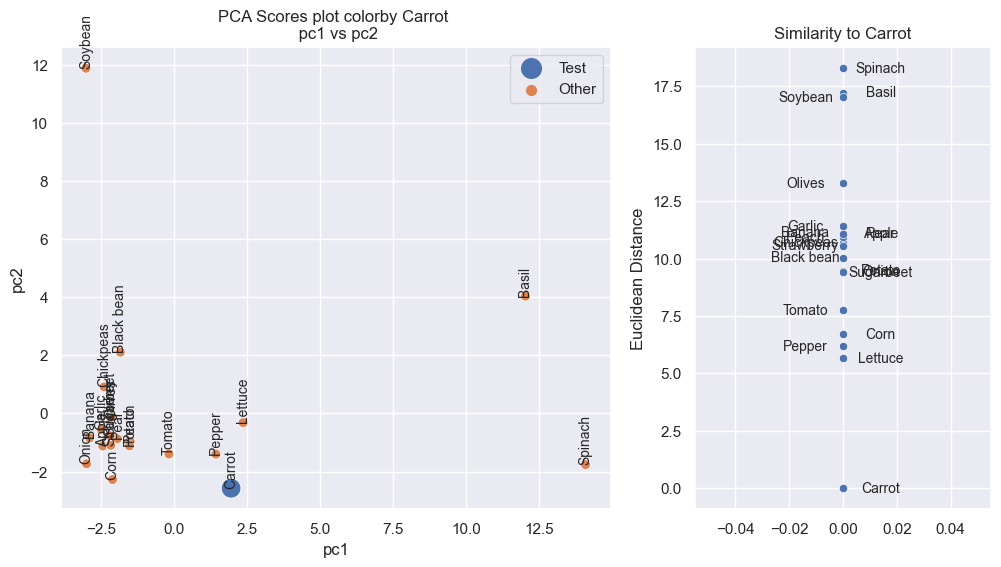

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, width_ratios=[0.65, 0.35],
                               figsize = (12,6)
                              )

xvar = 'pc1'
yvar = 'pc2'
test_food = "Carrot"
sns.set_theme()
cmap = ['Test' if val in test_food else 'Other' for val in scores.index]
sns.scatterplot(x = scores[xvar], y = scores[yvar], ax = ax1,
                hue = cmap, hue_order = ['Test', 'Other'],
                size = cmap, sizes = [200, 50], 
                size_order =['Test', 'Other']
               ).set_title(f'PCA Scores plot colorby {test_food} \n {xvar} vs {yvar}')

for val, (x,y) in scores[[xvar, yvar]].iterrows():
    ax1.annotate(val, xy=(x, y), xycoords='data', fontsize=10,
             ha='center', va='bottom', rotation = 90)



sns.scatterplot(x = 0, 
                y = sim_df[test_food], 
                ax= ax2).set_title(f'Similarity to {test_food}')
ax2.set_ylabel("Euclidean Distance")
x_off = -0.014
for val, y in sim_df[test_food].items():
    x_off *= -1
    ax2.annotate(val, xy=(x_off, y), xycoords='data', fontsize=10,
             ha='center', va='center', rotation = 0)
